In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32

/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5

/content/drive/My Drive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 3.0 MB 5.3 MB/s 
     |████████████████████████████████| 636 kB 43.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/images/train'
valPath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/images/val'
crsPath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/data/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  480
Validation images are :  120


In [ ]:
# trainimagePath = 'D:/yolov5_traffic_sign_detection/dataset/images/train'
# trainlabelPath = 'D:/yolov5_traffic_sign_detection/dataset/labels/train'
# valimagePath = 'D:/yolov5_traffic_sign_detection/dataset/images/val'
# vallabelPath = 'D:/yolov5_traffic_sign_detection/dataset/labels/val'

trainimagePath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/images/train'
trainlabelPath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/labels/train'
valimagePath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/images/val'
vallabelPath = '/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/labels/val'

#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath)

'/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/images/val/data'

In [ ]:
import os
data = os.listdir("/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/dataset/labels/val")
len(data)

121

In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5'

In [ ]:
!python train.py --img 415 --batch 16 --epochs 200 --data dataset.yaml --weights yolov5s.pt --cache 

100% 755k/755k [00:00<00:00, 23.2MB/s]
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=200, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
requirements: Pillow>=8.0.0 not found and is required by YOLOv5, attempting auto-update...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

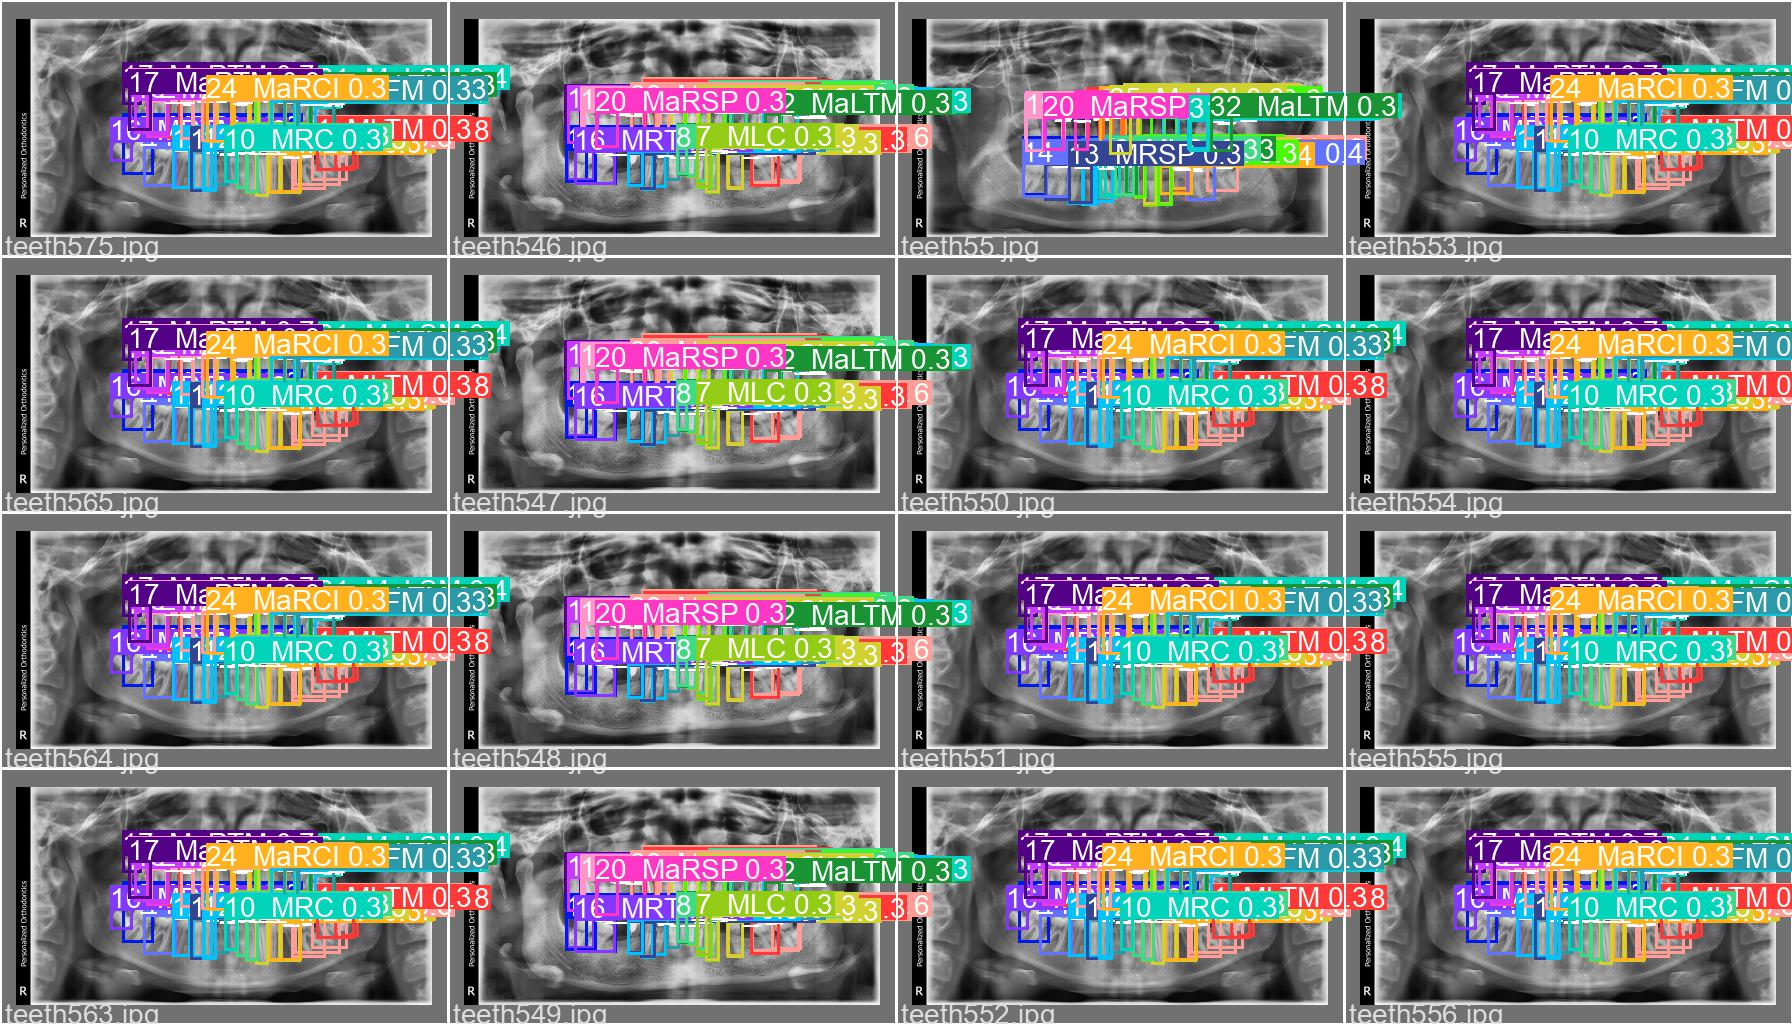

In [ ]:
Image(filename='/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5/runs/train/exp4/val_batch2_pred.jpg', width=1000)

In [ ]:
!python detect.py --source runs/train/exp4/teeth0.jpg --weights /content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5/runs/train/exp4/weights/best.pt

detect: weights=['/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5/runs/train/exp4/weights/best.pt'], source=runs/train/exp4/teeth0.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-419-gc5360f6 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7137517 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5/runs/train/exp4/teeth0.jpg: 352x640 2 1_MLTMs, 1 2_MLSM, 2 3_MLFMs, 1 4_MLSP, 1 5_MLFP, 3 6_MLLIs, 2 7_MLCs, 1 8_MLCI, 1 10_MRC, 1 11_MRLI, 1 12_MRFP, 1 13_MRSP, 1 14_MRFM, 1 15_MRSM, 1 16_MRTM, 1 17_MaRTM, 1 18_MaRSM, 2 19_MaRFMs, 1 20_MaRSP, 2 21_MaRFPs, 3

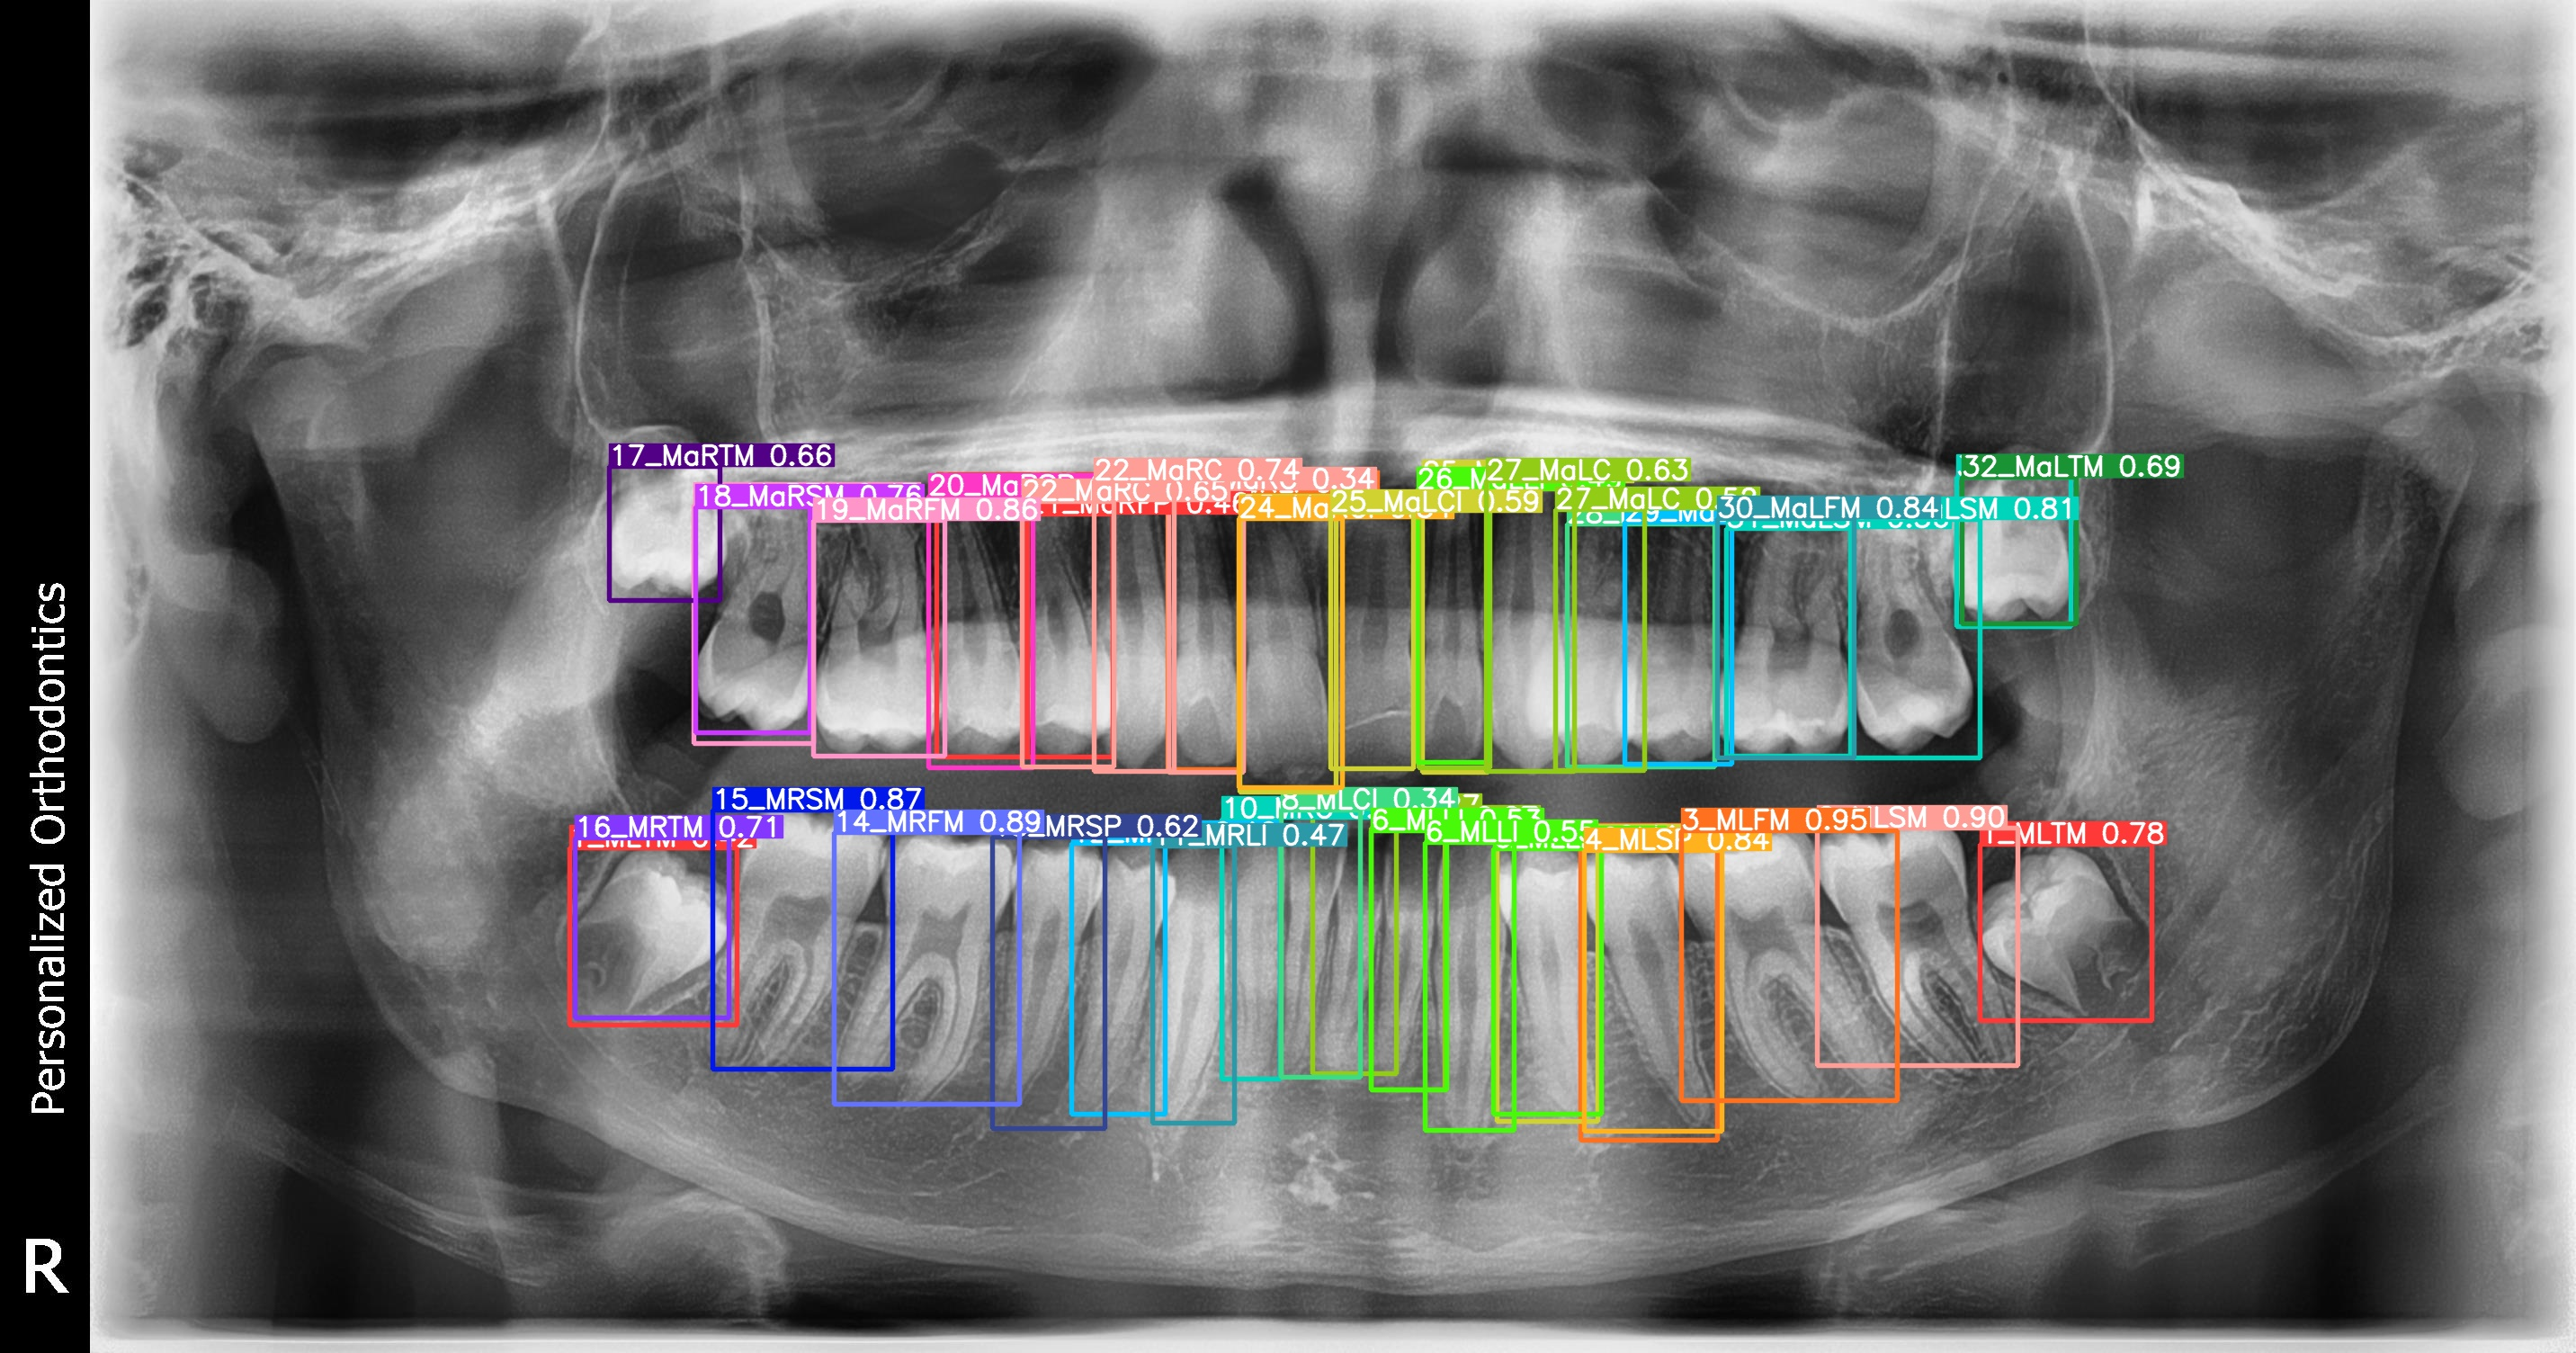

In [ ]:
Image(filename='runs/detect/exp2/teeth0.jpg', width=416)

In [ ]:

from utils.plots import plot_results 
plot_results(save_dir='/content/drive/MyDrive/CNN_Object_Detection_Project/Yolo_V5_V32/yolov5/runs/train/exp4')  # plot results.txt as results.png

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
